In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

plt.style.use('seaborn-darkgrid')

DATA_PATH = Path("__file__").absolute().parent / 'data'
COLORS = [
    '#FFFF66', '#FF945A', '#319EA1', '#D14A89',
    '#405E00', '#A0B7DA', '#FF6501', '#0082B6',
    '#F4C541', '#E79798', '#CBBDA2', '#FDC975',
         ]

%matplotlib inline

In [64]:
# Reading data and dropping usles or almost empty cols
df = pd.read_csv(DATA_PATH / 'data_cleaned.csv')

df.rename(columns={"date": "year", "date.1": "month", "date.2": "day"}, inplace=True)
df['date'] = pd.to_datetime(df[['day','month','year']])
df.index = df['date']

df.head(10)

,year,month,day,temperature,pressure,humidity,wind_dir,wind_speed,coluds_hight,rain,snow,fog,hail,drizzle,precipitation,ice_pellets,other,date
date,,,,,,,,,,,,,,,,,,
2013-01-02,2013,1,2,3.175000,747.637500,87.375000,5.0,4.125000,8.0,0,1,0,0,1,0,1,0.0,2013-01-02
2013-01-03,2013,1,3,4.787500,774.800000,77.000000,8.0,3.000000,8.0,0,0,0,0,0,0,0,0.0,2013-01-03
2013-01-04,2013,1,4,1.950000,764.175000,63.125000,10.0,2.250000,9.0,0,0,0,0,0,0,0,0.0,2013-01-04
2013-01-05,2013,1,5,8.000000,764.787500,58.000000,6.0,6.375000,9.0,0,1,0,0,0,0,1,0.0,2013-01-05
2013-01-06,2013,1,6,10.637500,766.562500,75.375000,5.0,3.750000,8.0,0,1,0,0,0,0,1,0.0,2013-01-06
2013-01-07,2013,1,7,12.800000,757.025000,65.125000,6.0,2.875000,8.0,0,1,0,0,0,0,1,0.0,2013-01-07
2013-01-08,2013,1,8,15.425000,755.000000,93.625000,8.0,4.000000,5.0,0,1,0,0,0,0,1,0.0,2013-01-08
2013-01-09,2013,1,9,14.362500,763.375000,64.625000,5.0,4.000000,8.0,0,0,0,0,0,0,0,0.0,2013-01-09
2013-01-10,2013,1,10,12.237500,760.845833,74.416667,6.0,6.750000,7.0,0,0,0,0,0,0,0,0.0,2013-01-10


In [65]:
df.corr()

,year,month,day,temperature,pressure,humidity,wind_dir,wind_speed,coluds_hight,rain,snow,fog,hail,drizzle,precipitation,ice_pellets,other
year,1.000000,-0.021260,-0.010544,-0.012514,-0.002466,0.037116,-0.053618,-0.015190,0.008885,0.035461,-0.138065,0.024333,0.020340,0.031001,0.025485,-0.226803,-0.019605
month,-0.021260,1.000000,0.004768,0.129167,-0.011051,0.150068,-0.033649,-0.059571,-0.015897,-0.012283,-0.086354,0.003549,0.030080,0.016288,-0.050430,-0.051403,-0.024125
day,-0.010544,0.004768,1.000000,0.077368,0.024952,0.002747,-0.026793,-0.038388,0.019336,0.016576,-0.034340,0.029029,-0.020700,-0.033340,-0.006267,-0.026643,0.017579
temperature,-0.012514,0.129167,0.077368,1.000000,0.093578,-0.089411,-0.017983,-0.040709,-0.202114,0.087918,-0.235097,0.088380,0.003012,-0.006988,-0.328390,-0.050035,0.064883
pressure,-0.002466,-0.011051,0.024952,0.093578,1.000000,-0.024924,0.152827,-0.268460,0.036764,0.050938,-0.073695,0.031211,0.008876,-0.102059,-0.004441,-0.038201,0.067337
humidity,0.037116,0.150068,0.002747,-0.089411,-0.024924,1.000000,0.196355,-0.228694,-0.588783,0.459706,0.171543,0.270472,0.027970,0.367567,0.013503,-0.019054,0.372117
wind_dir,-0.053618,-0.033649,-0.026793,-0.017983,0.152827,0.196355,1.000000,-0.290476,-0.265689,0.185797,0.089552,0.199578,-0.009461,0.081907,0.050166,0.071843,0.152509
wind_speed,-0.015190,-0.059571,-0.038388,-0.040709,-0.268460,-0.228694,-0.290476,1.000000,0.058103,-0.152049,0.049254,-0.246805,0.023102,0.067395,0.066219,0.033120,-0.108750
coluds_hight,0.008885,-0.015897,0.019336,-0.202114,0.036764,-0.588783,-0.265689,0.058103,1.000000,-0.416774,-0.199039,-0.367150,-0.035673,-0.371407,0.029439,-0.054118,-0.394078
rain,0.035461,-0.012283,0.016576,0.087918,0.050938,0.459706,0.185797,-0.152049,-0.416774,1.000000,0.075773,0.330710,0.029360,0.163064,-0.073786,-0.010782,0.626500


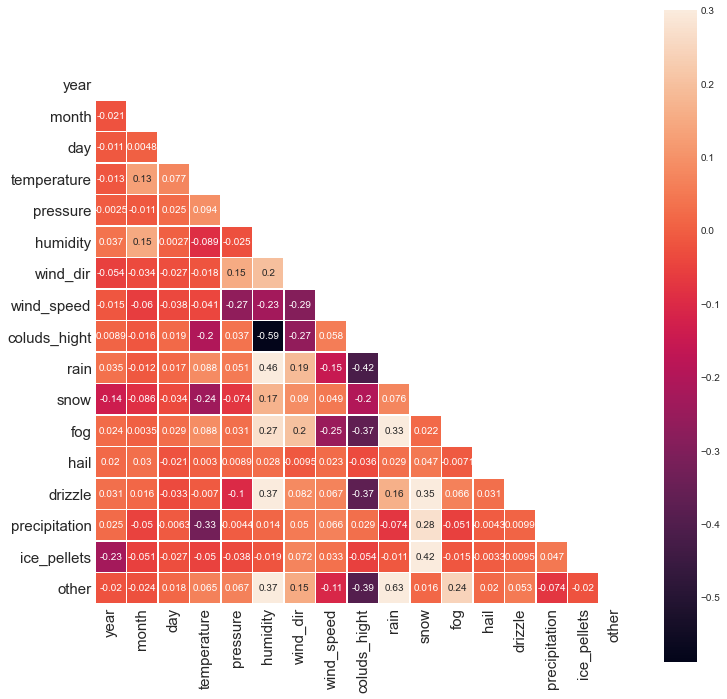

In [66]:
cor = df.corr()
# plot the heatmap and annotation on it
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(cor, mask=mask, vmax=.3, square=True, linewidth=.5, annot=True)
    ax.tick_params(axis='both', which='major', labelsize=15)

In [67]:
#Correlation with output variable
cor_target = abs(cor["temperature"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

month            0.129167
temperature      1.000000
coluds_hight     0.202114
snow             0.235097
precipitation    0.328390
Name: temperature, dtype: float64

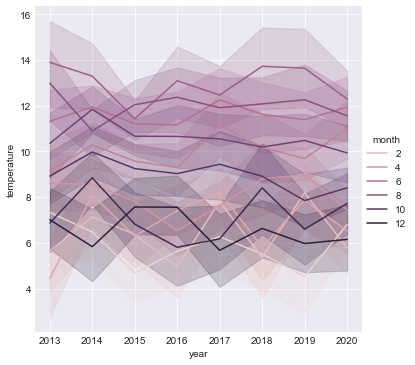

In [68]:
sns.relplot(data=df, x="year", y="temperature", hue="month", kind="line")

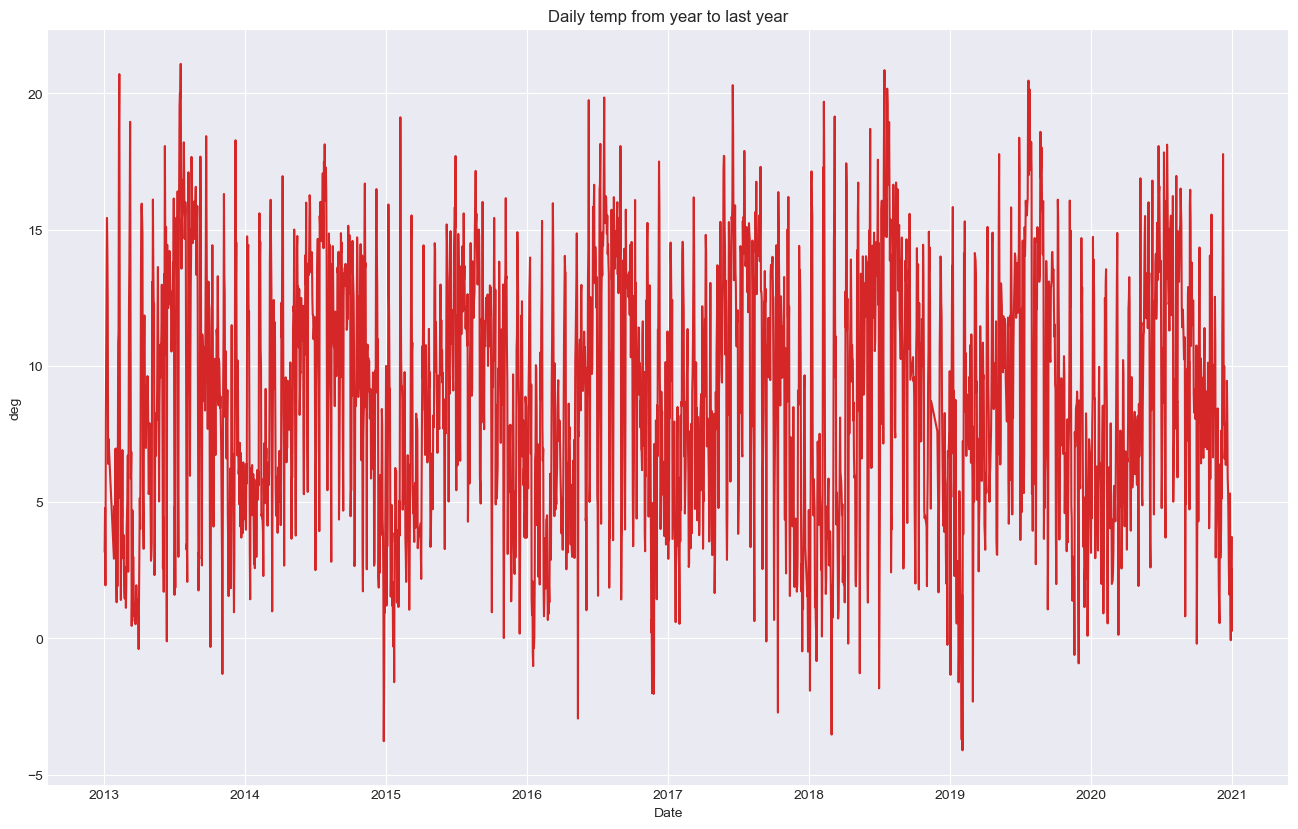

In [69]:
#plt dayly temperature change
plt.figure(figsize=(16,10), dpi=100)
plt.plot(df.index, df.temperature, color='tab:red')
plt.gca().set(title="Daily temp from year to last year", xlabel='Date', ylabel="deg")
plt.show()

<AxesSubplot:xlabel='date'>

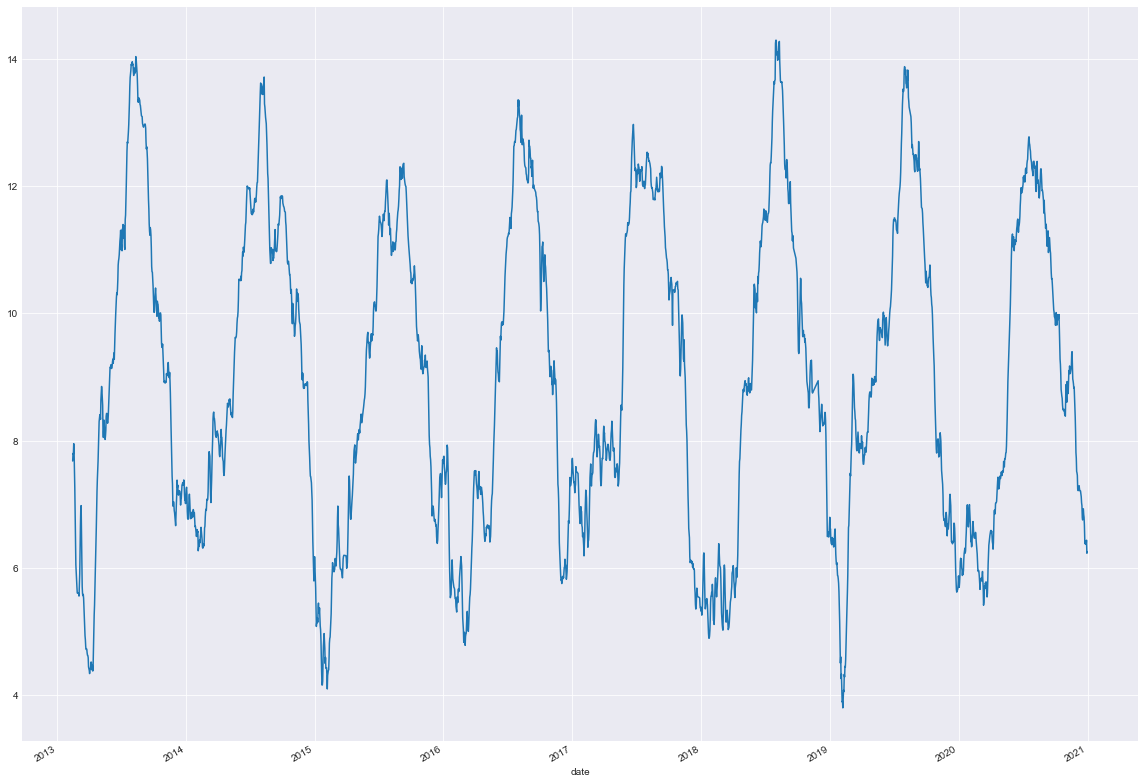

In [70]:
#apply the mocing average function by a subset of size 30 days
temp_df_mean = df.temperature.rolling(window=30).mean()
temp_df_mean.plot(figsize=(20,15))

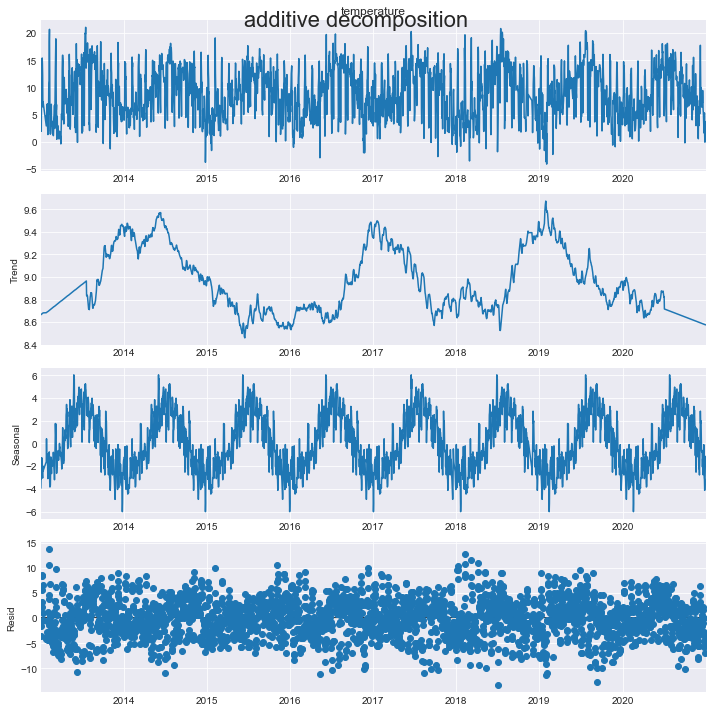

In [71]:

from statsmodels.tsa.seasonal import seasonal_decompose
#additive decomposition
result_add = seasonal_decompose(df.temperature, model='additiv', extrapolate_trend='freq', freq=365)

#plot
plt.rcParams.update({'figure.figsize':(10,10)})
result_add.plot().suptitle('additive decomposition', fontsize=22)
plt.show()

In [72]:
# shift the current temperature to the next day
predicted_df = df["temperature"].to_frame().shift(1).rename(columns={"temperature": "T_mu_pred"})
actual_df = df["temperature"].to_frame().rename(columns = {"temperature": "T_mu_actual"})

#concatanate the actual and predicted temeprature 
one_step_df = pd.concat([actual_df,predicted_df],axis=1)

#select from the second row, because no prediction for today because if the shifting
one_step_df = one_step_df[1:]
one_step_df.head(10)

,T_mu_actual,T_mu_pred
date,,
2013-01-03,4.787500,3.175000
2013-01-04,1.950000,4.787500
2013-01-05,8.000000,1.950000
2013-01-06,10.637500,8.000000
2013-01-07,12.800000,10.637500
2013-01-08,15.425000,12.800000
2013-01-09,14.362500,15.425000
2013-01-10,12.237500,14.362500
2013-01-11,6.408333,12.237500


In [73]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

#calculate the RMSE
temp_pred_err = sqrt(MSE(one_step_df.T_mu_actual, one_step_df.T_mu_pred))
print ("the RMSE is ", temp_pred_err)

the RMSE is  3.1864114633164204


In [74]:
import itertools

#define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0,2)

#generate all different combinations p, d and q triplets
pdq = list(itertools.product(p,d,q))

#generate all different combinattion of seasonal p, d and q triplets 
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in list(itertools.product(p, d, q))]
print("examples of parameter combinations for seasonal ARIMA...")

print("SARIMAX: {} x {}".format(pdq[1], seasonal_pdq[1]))
print("SARIMAX: {} x {}".format(pdq[1], seasonal_pdq[2]))
print("SARIMAX: {} x {}".format(pdq[2], seasonal_pdq[3]))
print("SARIMAX: {} x {}".format(pdq[2], seasonal_pdq[4]))

examples of parameter combinations for seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [75]:
# import warnings
# warnings.filterwarnings("ignore") 

# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(one_step_df.T_mu_actual,
#                 order=param,
#                 seasonal_order=param_seasonal,
#                 enforce_stationarity=False,
#                 enforce_invertibility=False)

#             results = mod.fit()

#             print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue

In [76]:
#import statsmodel for usibg SARIMA model
import statsmodels.api as sm

#fit the sarima model using optimal parameters 
mod = sm.tsa.statespace.SARIMAX(one_step_df.T_mu_actual,
                                order=(1,1,1),
                                seasonal_order=(1,0,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

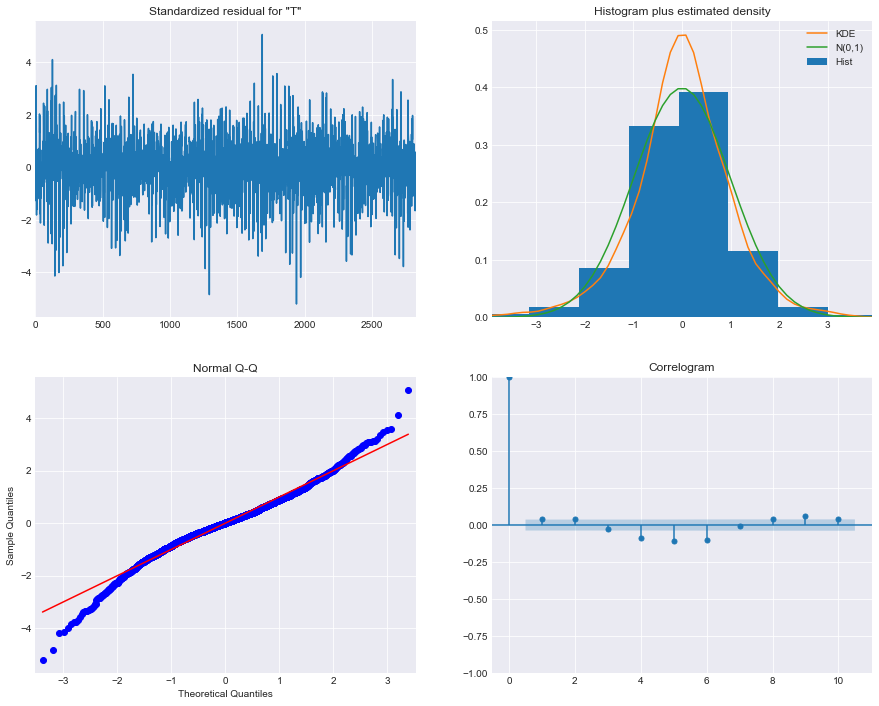

In [77]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [78]:
pred = results.get_prediction(start=pd.to_datetime('2015-04-12'), dynamics=False)
pred_ci = pred.conf_int()

In [83]:
pred_ci

,lower T_mu_actual,upper T_mu_actual
date,,
2015-04-12,2.224328,13.784383
2015-04-13,1.202088,12.762142
2015-04-14,1.594598,13.154653
2015-04-15,3.659113,15.219168
2015-04-16,2.295053,13.855107
...,...,...
2020-12-27,0.191245,11.751300
2020-12-28,-3.027974,8.532080
2020-12-29,-3.724416,7.835639


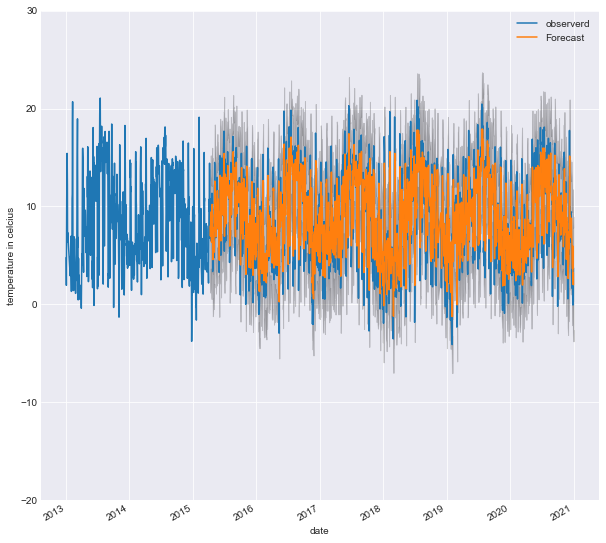

In [79]:
ax = one_step_df.T_mu_actual['2013':].plot(label='observerd')
pred.predicted_mean.plot(ax=ax, label="Forecast")

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('temperature in celcius')
plt.ylim([-20,30])
plt.legend()
plt.show()

In [80]:
y_forecasted = pred.predicted_mean
y_truth = one_step_df.T_mu_actual['2015-04-12':]
print(y_forecasted.shape)
print(y_truth.shape)
#compute the mean square error
mse = sqrt(MSE(y_truth, y_forecasted).mean())
print ("The mean squared error of forecasts is {}".format(round(mse,2)))

(2041,)
(2041,)
The mean squared error of forecasts is 2.93


In [81]:
#In the code chunk below, we specify to the dynamic forecasts and confidence intervals from May 2017 onwards.

pred_dynamics = results.get_prediction(start=pd.to_datetime('2015-05-19'),dynamic=True, full_results=True)
pred_dynamics_ci = pred_dynamics.conf_int()

In [ ]:
help(results.get_prediction)

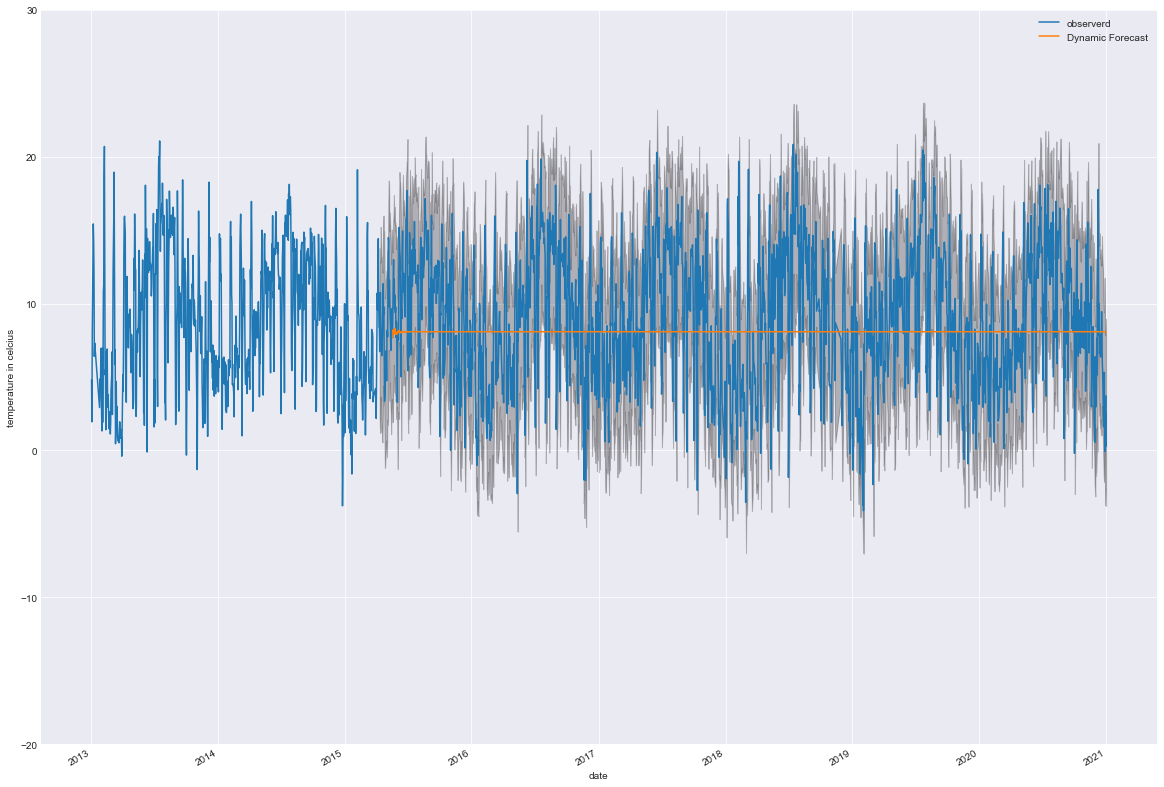

In [82]:
ax = one_step_df.T_mu_actual['2013':].plot(label='observerd', figsize=(20,15))
pred_dynamics.predicted_mean.plot(label="Dynamic Forecast", ax=ax)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('date')
ax.set_ylabel('temperature in celcius')
plt.ylim([-20,30])
plt.legend()
plt.show()

In [ ]:
#extract the predicted and true values of our time series
y_forecasted = pred_dynamics.predicted_mean
y_truth = one_step_df.T_mu_actual['2018-05-19':]
print(y_forecasted.shape)
print(y_truth.shape)
#compute the mean square error
mse = sqrt(MSE(y_truth, y_forecasted).mean())
print ("The mean squared error of forecasts is {}".format(round(mse,2)))